In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
data = pd.read_csv('ExpressionR50.csv', header =None)
rows = pd.read_csv('RowsR50.csv')
gene_id = rows.ix[:,2]
data_id = pd.concat([data, gene_id], axis=1)
new_data = data_id[data_id['gene-id']!= 0]
clean_data = new_data.ix[:,:-1]

In [36]:
just_data = new_data.ix[:,:11]
just_dataT = just_data.T

In [37]:
genes_pca = PCA()
genes_pc = genes_pca.fit_transform(just_dataT)

In [38]:
print(genes_pca.explained_variance_ratio_)

[  5.52523295e-01   1.64026867e-01   8.90240697e-02   4.87904868e-02
   4.43305194e-02   3.44542972e-02   2.15485343e-02   1.81371253e-02
   1.58532208e-02   1.13115844e-02   2.64330765e-31]


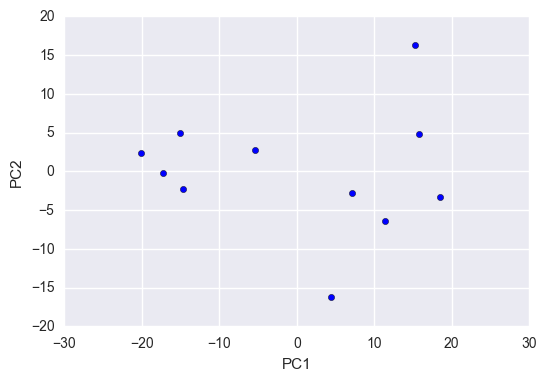

In [65]:
plt.scatter(x=genes_pc[:,0],y=genes_pc[:,1])
plt.xlabel('PC1')    
plt.ylabel('PC2')

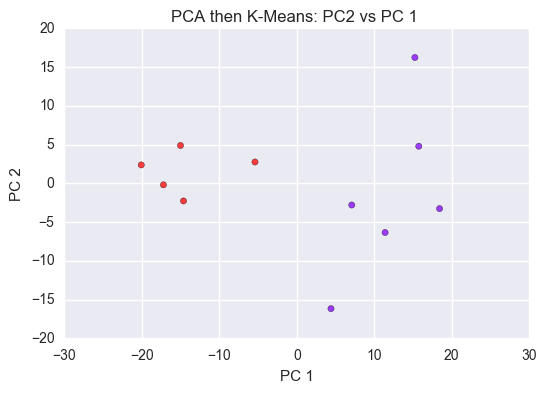

In [93]:
km = KMeans(n_clusters = 2)
clusters = km.fit(genes_pc)

labels = km.labels_

plt.scatter(genes_pc[:,0],genes_pc[:,1],
            alpha=0.75, c=labels, cmap='rainbow')


plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("PCA then K-Means: PC2 vs PC 1 ")

In [9]:
pd.DataFrame(new_data.ix[:,-1:]).head()
Predict = pd.DataFrame(labels)

In [10]:
Data_Predict = np.column_stack((new_data.iloc[:,11:13], Predict))
GeneID_Predict = pd.DataFrame(Data_Predict[:,:])

In [11]:
cluster0 = GeneID_Predict[GeneID_Predict[1]== 0]
cluster1 = GeneID_Predict[GeneID_Predict[1]== 1]
cluster2 = GeneID_Predict[GeneID_Predict[1]== 2]
cluster3 = GeneID_Predict[GeneID_Predict[1]== 3]
cluster4 = GeneID_Predict[GeneID_Predict[1]== 4]

In [12]:
Cluster0_genes = cluster0.iloc[:,0:1].values
Cluster1_genes = cluster1.iloc[:,0:1].values
Cluster2_genes = cluster2.iloc[:,0:1].values
Cluster3_genes = cluster3.iloc[:,0:1].values
Cluster4_genes = cluster4.iloc[:,0:1].values

In [24]:
genes_pc

array([[ -4.21069032e+00,   2.38979239e-01,  -3.98511421e-01, ...,
          6.35054022e-01,  -3.89460405e-01,   3.84681374e-01],
       [ -1.73081059e+01,  -5.83137003e-01,   2.48422585e-01, ...,
          2.97085128e-01,   1.26251387e-01,  -8.78282989e-03],
       [ -2.82377563e+00,  -3.54073512e-01,   1.61179573e-01, ...,
          9.08804061e-02,  -1.96556428e-01,   2.13047462e-01],
       ..., 
       [ -3.64915611e+00,  -3.67992955e-01,   8.04902852e-01, ...,
          5.88573566e-02,  -1.85872769e-02,  -1.95450169e-01],
       [  1.44122057e+00,   2.04526906e-01,   1.20635197e-01, ...,
         -2.05796385e-01,  -3.61281391e-03,  -1.05632472e-01],
       [ -1.14152467e+00,  -1.03319017e-02,   6.57018797e-01, ...,
          7.34723728e-02,   8.40224906e-02,  -6.75951637e-02]])

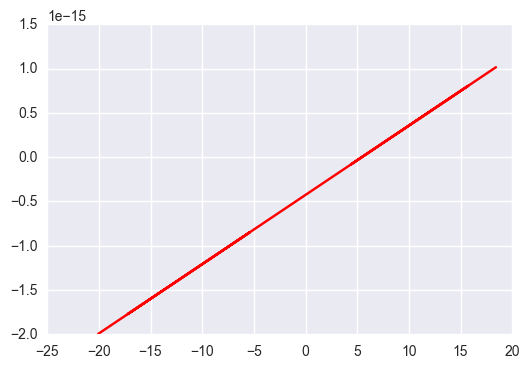

In [76]:

m = np.polyfit(genes_pc[:,0],genes_pc[:,1],1)
plt.plot(genes_pc[:,0], m[0]*genes_pc[:,0] + m[1], color='r')

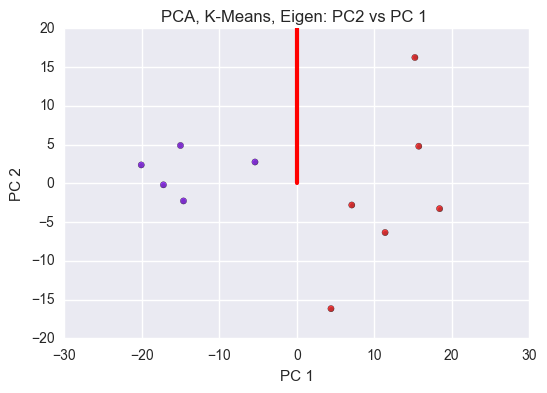

In [94]:
km = KMeans(n_clusters = 2)
clusters = km.fit(genes_pc)

labels = km.labels_

plt.scatter(genes_pc[:,0],genes_pc[:,1],
            alpha=0.75, c=labels, cmap='rainbow')


Cov = np.dot(genes_pc.T, genes_pc) / len(genes_pc)
T, D = np.linalg.eig(Cov)

plt.plot(genes_pc[:,0], genes_pc[:,1], 'k.', alpha=0.2)

pc1 = D[:, 1] * T[1]
plt.plot([0, pc1[0]], [0, pc1[1]], 'r-', linewidth=3)
plt.ylim(-20,20)

plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("PCA, K-Means, Eigen: PC2 vs PC 1 ")